In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotBars(df,field, fieldID, sort=True, topN=0):
    a = len(df[fieldID].unique())
    print('***Restaurant count:', a)
    res = (df[[fieldID,field]]
           .groupby(field)
           .count())
    if sort==True: res = res.sort_values(fieldID, ascending=False)
    if topN>0: res = res.head(topN) 
    res.plot.bar(figsize=(16,5))
    y = res[fieldID]
    for i, v in enumerate(y):
        plt.text(i-.1, v+7 , str(v), fontweight='bold')
    m = res.mean() 
    plt.plot([-1,i+1],[m,m],color='red')
    plt.legend(['Mean','Count'])
    plt.title(field)
    plt.show()

In [3]:
ratings = pd.read_csv('3_Ratings.csv')
users = pd.read_csv('2_user_perfil.csv')
restaurants = pd.read_csv('1_rest5_perfil.csv')

In [4]:
placeAux = pd.merge(ratings, restaurants, on='placeID', how='outer')
placeAux = pd.DataFrame(placeAux['placeID'].unique().copy())          #restaurant
placeAux.columns = ['placeID']
placeAux.sort_values(by=['placeID'], inplace=True)
placeAux.index = placeAux['placeID']
placeAux['autonum'] = np.arange(0,len(placeAux))
#--------------------------------Create autonumerate ID columns----------------------------------
ratings['userID_auto'] = (ratings['userID'].str[1:].astype(str).astype(int))-1001 #user
ratings['placeID_auto'] = ratings['placeID'].apply(lambda x: placeAux.loc[x][1])

In [5]:
ratings.info()
ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
userID_auto       1161 non-null int64
placeID_auto      1161 non-null int64
dtypes: int64(6), object(1)
memory usage: 63.6+ KB


,userID,placeID,rating,food_rating,service_rating,userID_auto,placeID_auto
0,U1077,135085,2,2,2,76,123
1,U1077,135038,2,2,1,76,84
2,U1077,132825,2,2,2,76,31


In [6]:
fields = ['rating', 'food_rating', 'service_rating']
ratings[fields].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


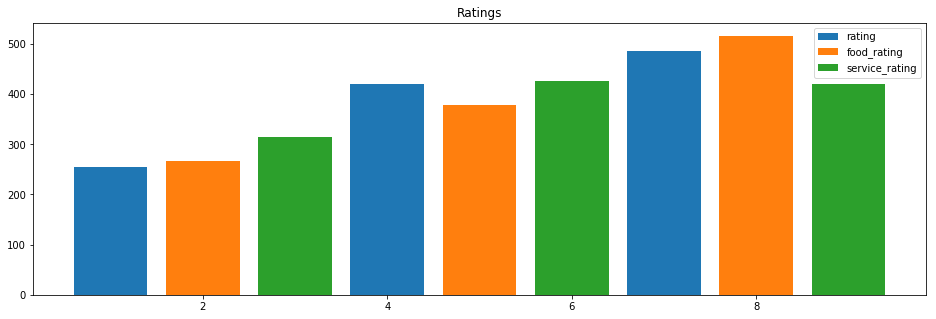

In [7]:
plt.figure(figsize=(16,5))
rat = (ratings[['placeID', 'rating']].groupby(['rating']).count())
plt.bar([1,4,7], rat['placeID'])
rat = (ratings[['placeID', 'food_rating']].groupby(['food_rating']).count())
plt.bar([2,5,8], rat['placeID'])
rat = (ratings[['placeID', 'service_rating']].groupby(['service_rating']).count())
plt.bar([3,6,9], rat['placeID'])
plt.legend(fields)
plt.title('Ratings')
plt.show()

***Restaurant count: 130


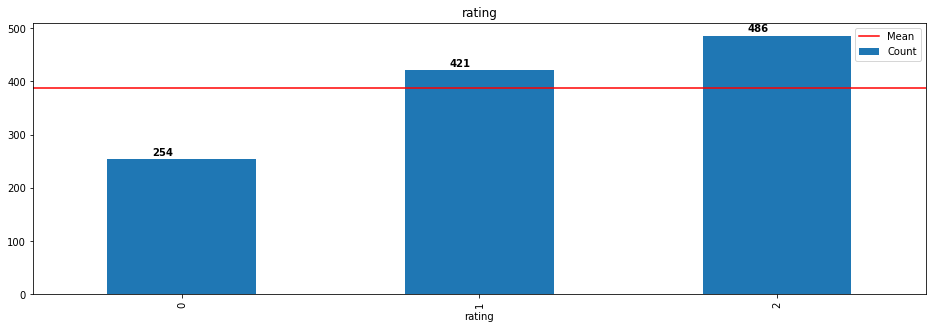

***Restaurant count: 130


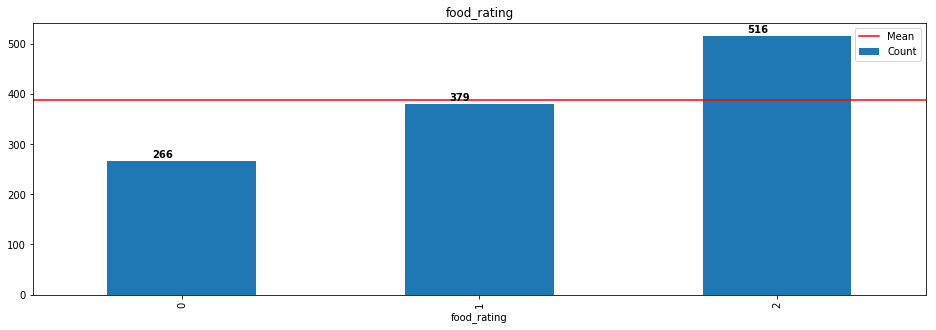

***Restaurant count: 130


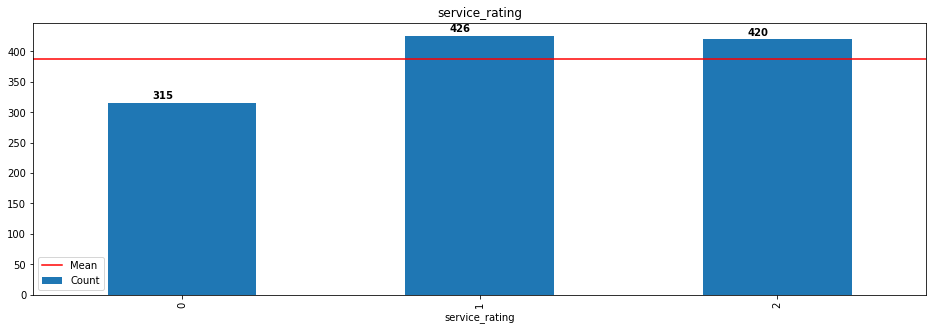

In [8]:
df = ratings[['placeID','rating']]
plotBars(df,'rating','placeID', sort=False)

df = ratings[['placeID','food_rating']]
plotBars(df,'food_rating','placeID', sort=False)

df = ratings[['placeID','service_rating']]
plotBars(df,'service_rating','placeID', sort=False)

## Save clean dataFrame

In [9]:
ratings.to_csv('ratingClean.csv', encoding='utf-8', index=False)